In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
youtube = pd.read_csv('USvideos.csv')

In [2]:
youtube['publish_month'] = pd.to_datetime(youtube['publish_time']).dt.month_name()

In [3]:
youtube['publish_month_num'] = pd.to_datetime(youtube['publish_time']).dt.month

In [4]:
youtube['publish_month_num'].head()

0    11
1    11
2    11
3    11
4    11
Name: publish_month_num, dtype: int64

In [5]:
Seasons = []
for i in youtube['publish_month_num'].values :
    if i >= 3 and i <= 5:
        Seasons.append('Spring')
    elif i >= 6 and i <= 8:
        Seasons.append('Summer')
    elif i >= 9 and i <= 11:
        Seasons.append('Autumn')
    else:
        Seasons.append('Winter')

youtube['Seasons'] = pd.Series(Seasons)
youtube.head(10)
        

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month,publish_month_num,Seasons
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,November,11,Autumn
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",November,11,Autumn
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,November,11,Autumn
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,November,11,Autumn
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,November,11,Autumn
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,November,11,Autumn
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,November,11,Autumn
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,November,11,Autumn
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",November,11,Autumn
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...",November,11,Autumn


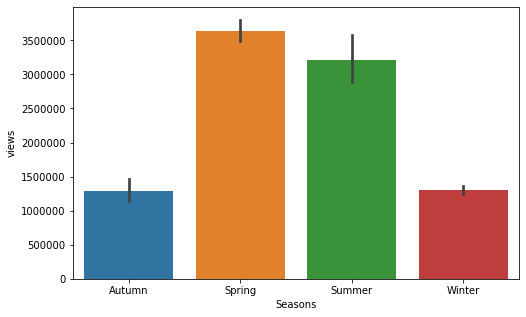

In [6]:
fig = plt.figure(figsize = (8,5))
sns.barplot(data = youtube, x = 'Seasons', y ='views')
plt.show()

# Tes Normality/Distribusi

In [7]:
from scipy.stats import shapiro,normaltest, anderson
def trynormal(data):
    result={'Anderson':{i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}, 'shapiro' : shapiro(data)[1],'k^2' : normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [8]:
trynormal(youtube[(youtube['Seasons'] == 'Autumn')]['likes'])
# trynormal(youtube[(youtube['Seasons'] == 'Spring')]['likes'])
# trynormal(youtube[(youtube['Seasons'] == 'Summer')]['likes'])
# trynormal(youtube[(youtube['Seasons'] == 'Winter')]['likes'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1086.661115004069},
 'shapiro': 0.0,
 'k^2': 0.0}

In [9]:
# klu stat lbh besar dr citical value berarti distribusi tdk normal
# shapiro dan k^2 sm kaya p value , klu p < 0.05 berarti ada perbedaan, distribusi tdk normal

In [10]:
trynormal(youtube[(youtube['Seasons'] == 'Spring')]['likes'])

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 3560.9829258459213},
 'shapiro': 0.0,
 'k^2': 0.0}

In [11]:
trynormal(youtube[(youtube['Seasons'] == 'Summer')]['likes'])

{'Anderson': {15.0: 0.573,
  10.0: 0.653,
  5.0: 0.783,
  2.5: 0.913,
  1.0: 1.087,
  'stat': 164.14229803337196},
 'shapiro': 2.802596928649634e-45,
 'k^2': 5.1677471996842025e-164}

In [12]:
trynormal(youtube[(youtube['Seasons'] == 'Winter')]['likes'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 3660.3000707250976},
 'shapiro': 0.0,
 'k^2': 0.0}

In [13]:
df = youtube[['likes','dislikes','views']]

In [14]:
df.head()

,likes,dislikes,views
0,57527,2966,748374
1,97185,6146,2418783
2,146033,5339,3191434
3,10172,666,343168
4,132235,1989,2095731


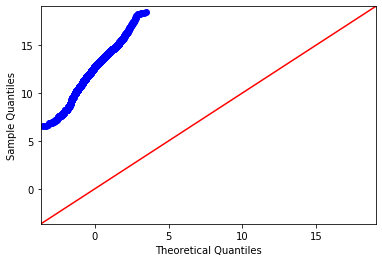

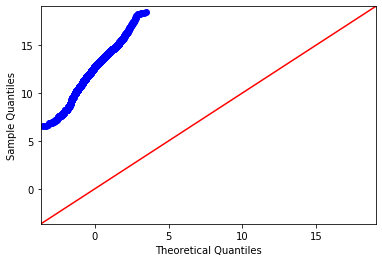

In [15]:
import statsmodels.api as sm 
# sm.qqplot(youtube[youtube['Seasons']=='Autumn']['views'], line = '45')
sm.qqplot(np.log(youtube[youtube['Seasons']=='Autumn']['views']), line='45')

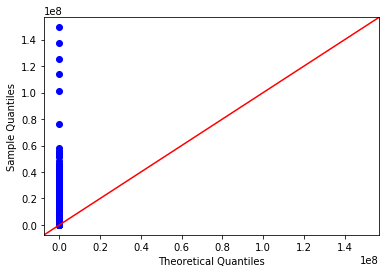

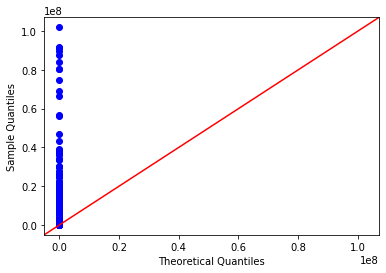

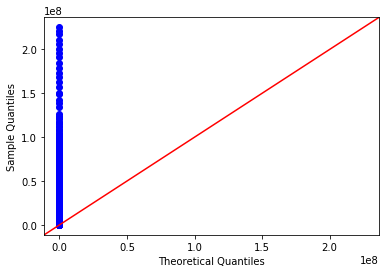

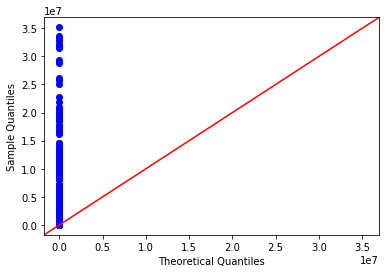

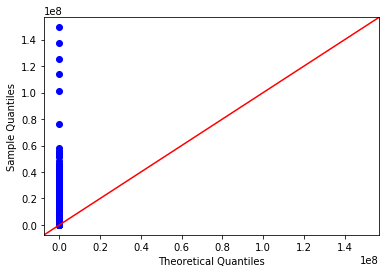

In [16]:
sm.qqplot(youtube[youtube['Seasons']== 'Autumn']['views'], line = '45')
sm.qqplot(youtube[youtube['Seasons']== 'Spring']['views'], line = '45')
sm.qqplot(youtube[youtube['Seasons']== 'Summer']['views'], line = '45')
sm.qqplot(youtube[youtube['Seasons']== 'Winter']['views'], line = '45')

# Pairwise Test

In [17]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(youtube[youtube['Seasons']== 'Autumn']['views'],
                          youtube[youtube['Seasons'] == 'Autumn']['views']))
print('U-Statistic:',result[0])
print('P-Value:',result[1])

U-Statistic: 9266512.5
P-Value: 0.4999982703001339


In [18]:
# p value > 0,05 maka hipotesis nol (H0) diterima.artinya tidak ditemukan perbedaan antara nilai Seasons['Autumn'] dan Views 

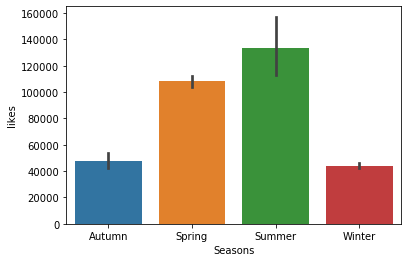

In [19]:
sns.barplot(data=youtube, x ='Seasons', y='likes')

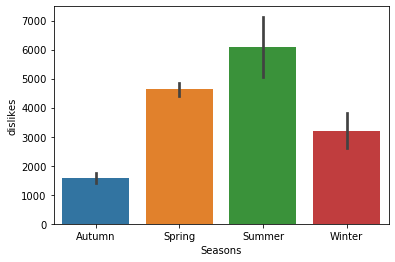

In [20]:
sns.barplot(data=youtube, x ='Seasons', y='dislikes')

# Tes Equal Variance

In [21]:
from scipy.stats import levene, bartlett, f_oneway, kruskal

youtube_autumn = youtube[(youtube['Seasons'] == 'Autumn' )]
youtube_spring = youtube[(youtube['Seasons'] == 'Spring' )]
youtube_summer = youtube[(youtube['Seasons'] == 'Summer' )]
youtube_winter = youtube[(youtube['Seasons'] == 'Winter' )]
def try_equal_var(x1,x2):
    result = {'Bartlett':{'Bartlett-Stat': bartlett(x1,x2)[0],'P-Value': bartlett(x1,x2)[1]},
             'Levene':{'Levene-Stat': levene(x1,x2)[0], 'P-Value': levene(x1,x2)[1]}}
    return result
try_equal_var(youtube_autumn['views'],youtube_summer['views'])

{'Bartlett': {'Bartlett-Stat': 1.5877018851645652,
  'P-Value': 0.20765477781184719},
 'Levene': {'Levene-Stat': 48.28099658070194,
  'P-Value': 4.155835115431815e-12}}

In [22]:
try_equal_var(youtube_autumn['likes'],youtube_summer['likes'])

{'Bartlett': {'Bartlett-Stat': 385.43180837111254,
  'P-Value': 8.173215787141062e-86},
 'Levene': {'Levene-Stat': 75.0638799818352, 'P-Value': 6.031983720528498e-18}}

In [23]:
try_equal_var(youtube_autumn['dislikes'],youtube_summer['dislikes'])

{'Bartlett': {'Bartlett-Stat': 1801.1710307121175, 'P-Value': 0.0},
 'Levene': {'Levene-Stat': 164.29395905960766,
  'P-Value': 4.832010228336011e-37}}

### Anova

In [24]:
f_oneway(youtube_autumn['views'], youtube_summer['views'],youtube_winter['views'])

F_onewayResult(statistic=78.89872358091165, pvalue=7.107843966018978e-35)

In [25]:
from pingouin import welch_anova

In [26]:
youtube_seasons = youtube[(youtube['Seasons'] == 'Autumn' ) | (youtube['Seasons'] == 'Summer' )|(youtube['Seasons'] == 'Winter')|(youtube['Seasons'] == 'Spring')]
welch_anova(data=youtube_seasons, dv='views', between = 'Seasons')

,Source,ddof1,ddof2,F,p-unc
0,Seasons,3,3505.433,318.796,5.098346e-183


In [27]:
youtube_seasons = youtube[(youtube['Seasons'] == 'Autumn' ) | (youtube['Seasons'] == 'Summer' )|(youtube['Seasons'] == 'Winter')|(youtube['Seasons'] == 'Spring')]
welch_anova(data=youtube_seasons, dv='views', between = 'likes')

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\pingouin\parametric.py:1285: RuntimeWarning:

invalid value encountered in double_scalars



,Source,ddof1,ddof2,F,p-unc
0,likes,29849,55363.475,0.0,1.0


In [28]:
youtube_seasons = youtube[(youtube['Seasons'] == 'Autumn' ) | (youtube['Seasons'] == 'Summer' )|(youtube['Seasons'] == 'Winter')|(youtube['Seasons'] == 'Spring')]
welch_anova(data=youtube_seasons, dv='views', between = 'dislikes')

,Source,ddof1,ddof2,F,p-unc
0,dislikes,8515,13206.605,0.0,1.0


## Post Hoc

In [29]:
from pingouin import pairwise_gameshowell, pairwise_tukey

In [30]:
pairwise_gameshowell(data= youtube_seasons, dv='views', between='Seasons')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,Autumn,Spring,1295131.708,3637077.523,-2341945.815,76903.477,two-sided,-21.534,12716.990,0.001000,-0.365
1,Autumn,Summer,1295131.708,3209802.164,-1914670.456,137737.836,two-sided,-9.829,1149.822,0.001000,-0.377
2,Autumn,Winter,1295131.708,1298645.689,-3513.981,59981.766,two-sided,-0.041,5531.273,0.900000,-0.001
3,Spring,Summer,3637077.523,3209802.164,427275.359,136208.010,two-sided,2.218,1106.331,0.118632,0.080
4,Spring,Winter,3637077.523,1298645.689,2338431.834,56380.163,two-sided,29.328,23442.975,0.001000,0.310
5,Summer,Winter,3209802.164,1298645.689,1911156.475,127421.700,two-sided,10.606,848.440,0.001000,0.382


In [31]:
# h0 yg ditolak 2 & 3 , krn p vall > 0.05

In [32]:
pairwise_gameshowell(data= youtube_seasons, dv='likes', between='Seasons')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,Autumn,Spring,47923.792,108088.289,-60164.497,2604.844,two-sided,-16.332,9755.651,0.001000,-0.277
1,Autumn,Summer,47923.792,133657.974,-85734.182,8075.958,two-sided,-7.507,922.006,0.001000,-0.288
2,Autumn,Winter,47923.792,44003.800,3919.992,2190.919,two-sided,1.265,5237.657,0.769697,0.021
3,Spring,Summer,108088.289,133657.974,-25569.685,7957.080,two-sided,-2.272,869.670,0.104800,-0.082
4,Spring,Winter,108088.289,44003.800,64084.489,1701.219,two-sided,26.637,24407.519,0.001000,0.281
5,Summer,Winter,133657.974,44003.800,89654.174,7831.350,two-sided,8.095,816.049,0.001000,0.292


In [33]:
pairwise_gameshowell(data= youtube_seasons, dv='dislikes', between='Seasons')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,Autumn,Spring,1575.712,4631.322,-3055.611,106.108,two-sided,-20.363,19168.961,0.00100,-0.346
1,Autumn,Summer,1575.712,6084.101,-4508.389,387.440,two-sided,-8.228,848.055,0.00100,-0.316
2,Autumn,Winter,1575.712,3195.687,-1619.976,223.449,two-sided,-5.126,20474.044,0.00100,-0.087
3,Spring,Summer,4631.322,6084.101,-1452.778,391.722,two-sided,-2.622,886.201,0.04351,-0.094
4,Spring,Winter,4631.322,3195.687,1435.635,230.795,two-sided,4.398,23432.593,0.00100,0.046
5,Summer,Winter,6084.101,3195.687,2888.413,438.311,two-sided,4.660,1383.160,0.00100,0.168


In [34]:
pairwise_tukey(data=youtube_seasons, dv='views', between='Seasons')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,Autumn,Spring,1295131.708,3637077.523,-2341945.815,123939.987,two-sided,-18.896,0.001000,-0.321
1,Autumn,Summer,1295131.708,3209802.164,-1914670.456,280438.543,two-sided,-6.827,0.001000,-0.262
2,Autumn,Winter,1295131.708,1298645.689,-3513.981,123978.176,two-sided,-0.028,0.900000,-0.000
3,Spring,Summer,3637077.523,3209802.164,427275.359,263112.316,two-sided,1.624,0.365771,0.059
4,Spring,Winter,3637077.523,1298645.689,2338431.834,77155.053,two-sided,30.308,0.001000,0.320
5,Summer,Winter,3209802.164,1298645.689,1911156.475,263130.307,two-sided,7.263,0.001000,0.262


# Uji Non Parametrik

In [35]:
kruskal(youtube_spring['views'], youtube_autumn['views'], youtube_winter['views'], youtube_summer['views'])

KruskalResult(statistic=7047.096841063085, pvalue=0.0)

In [36]:
kruskal(youtube_spring['dislikes'], youtube_autumn['dislikes'], youtube_winter['dislikes'], youtube_summer['dislikes'])

KruskalResult(statistic=4673.571500076225, pvalue=0.0)

In [37]:
kruskal(youtube_spring['likes'], youtube_autumn['likes'], youtube_winter['likes'], youtube_summer['likes'])

KruskalResult(statistic=5308.643036224076, pvalue=0.0)

In [38]:
# ada perbedaan views, likes, dan dislikes terhadap seasons

In [39]:
from pingouin import pairwise_ttests

In [40]:
pairwise_ttests(data=youtube_seasons, dv='views', between='Seasons',parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Seasons,Autumn,Spring,False,False,18752760.5,two-sided,0.000000e+00,-0.254
1,Seasons,Autumn,Summer,False,False,814837.0,two-sided,3.671005e-126,-0.369
2,Seasons,Autumn,Winter,False,False,36058817.5,two-sided,8.300967e-11,-0.001
3,Seasons,Spring,Summer,False,False,6734961.0,two-sided,1.134166e-03,0.044
4,Seasons,Spring,Winter,False,False,236050929.0,two-sided,0.000000e+00,0.309
5,Seasons,Summer,Winter,False,False,10706892.5,two-sided,3.980226e-121,0.480


In [41]:
# klu hedges klu min(-) adalah 
# p-unc = p value median

In [42]:
pairwise_ttests(data=youtube_seasons, dv='dislikes', between='Seasons',parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Seasons,Autumn,Spring,False,False,21521402.0,two-sided,0.000000e+00,-0.207
1,Seasons,Autumn,Summer,False,False,835874.0,two-sided,1.547882e-120,-0.556
2,Seasons,Autumn,Winter,False,False,35099503.5,two-sided,1.615794e-19,-0.044
3,Seasons,Spring,Summer,False,False,6170166.5,two-sided,2.323327e-12,-0.090
4,Seasons,Spring,Winter,False,False,219874019.0,two-sided,0.000000e+00,0.047
5,Seasons,Summer,Winter,False,False,10487552.0,two-sided,1.106743e-106,0.073


In [43]:
pairwise_ttests(data=youtube_seasons, dv='likes', between='Seasons',parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Seasons,Autumn,Spring,False,False,21531502.0,two-sided,0.000000e+00,-0.216
1,Seasons,Autumn,Summer,False,False,909416.5,two-sided,6.920625e-102,-0.396
2,Seasons,Autumn,Winter,False,False,36678916.5,two-sided,1.221096e-06,0.027
3,Seasons,Spring,Summer,False,False,6649032.5,two-sided,1.298305e-04,-0.086
4,Seasons,Spring,Winter,False,False,226079681.0,two-sided,0.000000e+00,0.281
5,Seasons,Summer,Winter,False,False,10382826.0,two-sided,4.104912e-100,0.637


Text(0.5, 1.0, 'dislikes')

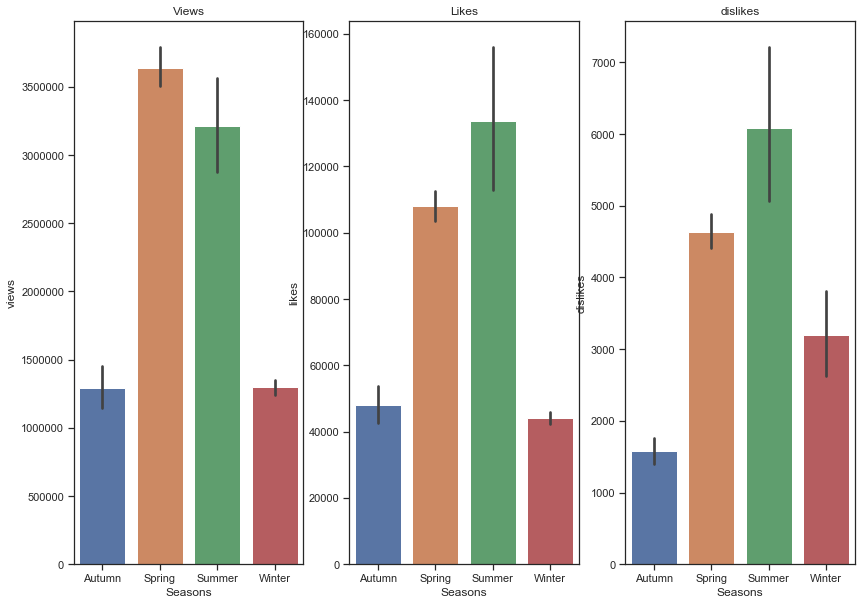

In [44]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
sns.barplot(data=youtube, x = 'Seasons', y='views')
plt.title('Views')

plt.subplot(1,3,2)
sns.barplot(data=youtube, x ='Seasons', y='likes')
plt.title('Likes')

plt.subplot(1,3,3)
sns.barplot(data=youtube, x='Seasons', y='dislikes')
plt.title('dislikes')



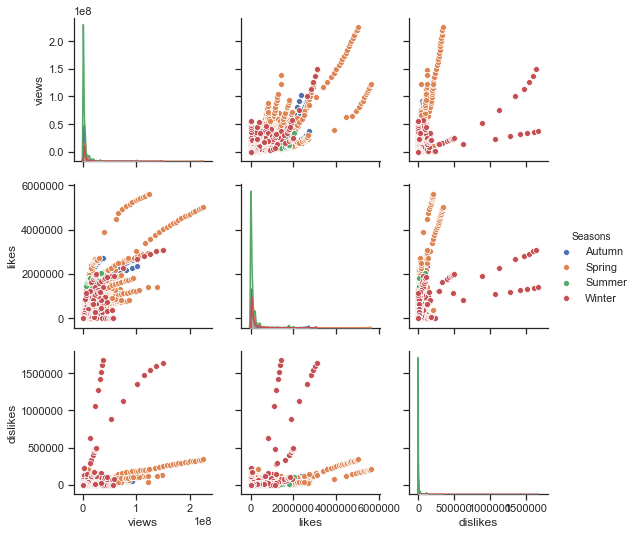

In [64]:
sns.pairplot(youtube[['views','likes','dislikes','Seasons']], hue = 'Seasons')

# Chi Square Independet T-Test

In [47]:
from scipy.stats import chisquare

In [48]:
chisquare(np.array(youtube.groupby('Seasons').count()['views']))

Power_divergenceResult(statistic=23658.15866077316, pvalue=0.0)

In [49]:
# bearti H0 tdk ada hubungan, h1 ada hubungan, secara kategorical seasons ada hubungan dgn views
# chisquare membandingkan dgn ekspektasi distribusi

In [50]:
youtube.groupby('Seasons').count()['views']

Seasons
Autumn     4305
Spring    17948
Summer      805
Winter    17891
Name: views, dtype: int64

# Multi Variance Normal Distribusi

In [51]:
from pingouin import multivariate_normality

In [52]:
# too much consumption for bigger data
# dalam normality ketika data berhubungan dia seharusnya mengikuti normal distribusi


# Multivariate Outlier

In [53]:
youtube_test = youtube[['views','likes','dislikes']]

### Mahalanobis

In [54]:
# kita akan mendapat suatu jarak/distance = mahala distance
from mahalanobis import Mahalanobis

In [55]:
youtube_test['mahala_pack'] = Mahalanobis(np.array(youtube_test),len(youtube_test)).distances

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
youtube_test

,views,likes,dislikes,mahala_pack
0,748374,57527,2966,0.311529
1,2418783,97185,6146,0.191899
2,3191434,146033,5339,0.429749
3,343168,10172,666,0.290097
4,2095731,132235,1989,0.547969
...,...,...,...,...
40944,1685609,38160,1385,0.179273
40945,1064798,60008,382,0.245676
40946,1066451,48068,1032,0.187450
40947,5660813,192957,2846,0.599505


In [57]:
# mahala distance menggunakan chi square utk perhitungannya
from scipy.stats import chi2
chi2.ppf((1-0.01),df=2)
# df =2 adl jumlah fitur/dimensi dikurangi 1 (3-1 =2)
# mahala distance more than 9,21 is considered as outlier
# if using P-value then the H0 is not outlier and the H1 is outlier

9.21034037197618

In [58]:
youtube_test['p-value']=1-chi2.cdf(youtube_test['mahala_pack'],2)

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Non Outlier'

In [60]:
youtube_test['Outlier'] = youtube_test['p-value'].apply(name_outlier)

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



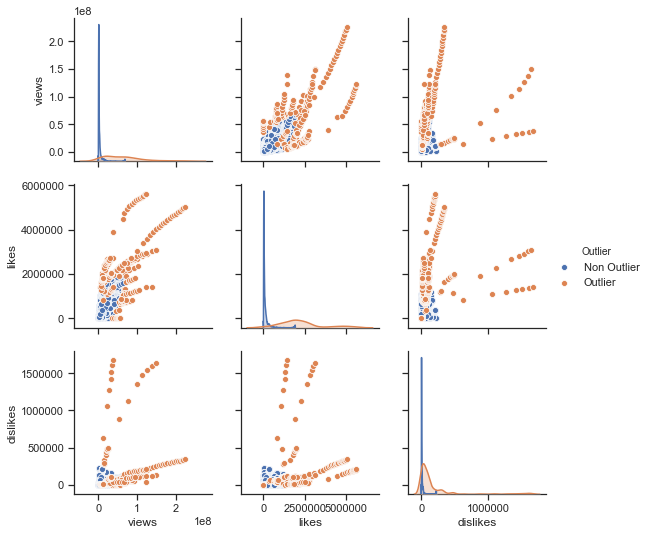

In [63]:
sns.pairplot(youtube_test[['views','likes','dislikes','Outlier']], hue = 'Outlier')

In [66]:
youtube_test['Outlier'].value_counts()

Non Outlier    40733
Outlier          216
Name: Outlier, dtype: int64

In [67]:
from pingouin import corr

In [69]:
corr(youtube['views'], youtube['dislikes'], method='percbend')

,n,r,CI95%,r2,adj_r2,p-val,power
percbend,40949,0.81,"[0.81, 0.81]",0.657,0.657,0.0,1.0


In [ ]:
# t test , regresi utk data normal